In [ ]:
!apt-get install libeccodes-tools
!pip install pdbufr
!pip install cartopy
!pip install pybufrkit

In [3]:
import pdbufr
df_0030 = pdbufr.read_bufr('drive/MyDrive/2024-02-14/00-30/AMV.bufr', columns="data",flat=True)
df = df_0030
# print(df)
df.T[0:40]

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,31337,31338,31339,31340,31341,31342,31343,31344,31345,31346
#1#centre,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
#1#subCentre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#1#softwareVersionNumber,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,...,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9,MPEF_2.9
#1#databaseIdentification,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
#1#satelliteIdentifier,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56
#1#satelliteChannelCentreFrequency,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,47966800000000.0,...,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0,399723300000000.0
#1#directionOfMotionOfMovingObservingPlatform,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
#1#crossTrackResolution,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
#1#alongTrackResolution,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
#1#segmentSizeAtNadirInXDirection,72000,72000,72000,72000,72000,72000,72000,72000,72000,72000,...,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000


<ipython-input-5-c71e76c68257>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['#1#pressureColor'] = np.select(


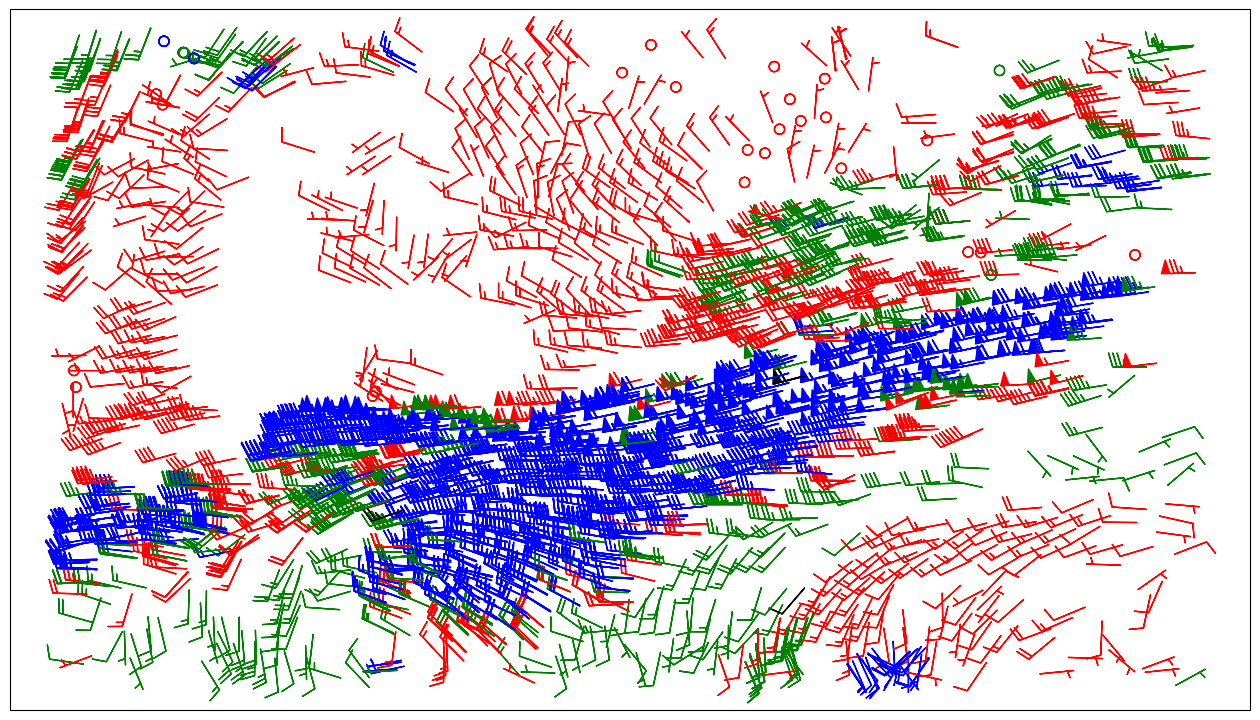

In [5]:
# UPPER OR LOWER LEVEL WIND
# Note :: uncomment pressure brackets --- GOTO [@UPPER_LEVEL] OR [@LOWER_LEVEL]
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

## [@UPPER_LEVEL]
minMaxVal = [10000 , 50000]
pressure_brackets = [
    (10000, 25000),
    (25100, 35000),
    (35100, 50000)
]

## [@LOWER_LEVEL]
# minMaxVal = [40000 , 95000]
# pressure_brackets = [
#     (40000, 59900),
#     (60000, 79900),
#     (80000, 95000)
# ]

filtered_df = df[
    (df['#1#latitude'] >= latBound[0])
    & (df['#1#latitude'] <= latBound[1])
    & (df['#1#longitude'] >= lngBound[0])
    & (df['#1#longitude'] <= lngBound[1])
    & (df['#1#pressure'] >= minMaxVal[0])
    & (df['#1#pressure'] <= minMaxVal[1])
]

pressure_labels = ['blue', 'green', 'red']

filtered_df['#1#pressureColor'] = np.select(
    [((filtered_df['#1#pressure'] >= low) & (filtered_df['#1#pressure'] <= high)) for low, high in pressure_brackets],
    pressure_labels, default='black'
)

# Correct the wind vector calculation
# windu = -df['#1#windSpeed'] * np.sin(np.radians(df['#1#windDirection']))
# windv = -df['#1#windSpeed'] * np.cos(np.radians(df['#1#windDirection']))

# Create a cartopy map with PlateCarree projection
# print(filtered_df['#1#windSpeed'])
fig = plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mercator())

# cmap = ListedColormap(pressure_labels)
# norm = plt.Normalize(minMaxVal[0], minMaxVal[1])
# sm = ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax, label='Pressure')


# Plot wind barbs with different colors based on pressure brackets
barbs = ax.barbs(filtered_df['#1#longitude'], filtered_df['#1#latitude'], filtered_df['#1#u'] ,filtered_df['#1#v'], color=filtered_df['#1#pressureColor'], pivot='middle', transform=ccrs.PlateCarree())
# Add coastlines and other features to the map
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

plt.show()


In [ ]:
import altair as alt
chart = alt.Chart(df).mark_point().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='windDirection:Q',
    tooltip=['#1#latitude', '#1#longitude', '#1#windDirection', '#1#windSpeed', '#1#airTemperature']
).properties(width=600,height=400)
# chart.save('chart.html')
chart

alt.Chart(...)

In [ ]:
# ========= TEMP CODE ====================

In [ ]:
!pip install cfgrib matplotlib numpy

In [ ]:
!pip install pybufr-ecmwf